## Machine Learning Pipeline - Data Analysis

## Dataset

<h4> We will use the Nepal's earthquake dataset available on <a href="https://www.kaggle.com/datasets/mullerismail/richters-predictor-modeling-earthquake-damage">Kaggle.com.</a> See below for more details.</h4>

#### The data was collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics

### Predicting Earthquake Damage

#### We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. 

#### There are 3 grades of the damage:

<h4>1. represents low damage<br><br>
2. represents a medium amount of damage<br><br>
3. represents almost complete destruction</h4>

## Data Acquisition 
### Download dataset using kaggle API

In [15]:
import kagglehub
import os
import shutil 

# Download latest version
downloaded_path = kagglehub.dataset_download("mullerismail/richters-predictor-modeling-earthquake-damage")
downloaded_path = kagglehub.dataset_download("mullerismail/richters-predictor-modeling-earthquake-damage")

working_dir = "./Datasets/"

for file in os.listdir(downloaded_path):
    print(file)
    if file =='Project':
        pass
    else:
        shutil.copy(os.path.join(downloaded_path,file),os.path.join(working_dir,file))

train_values.csv
test_values.csv
Project
submission_format.csv
train_labels.csv


### Data Analysis

In [53]:
import pandas as pd
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Let's go ahead and load the dataset.

In [17]:
train_values = pd.read_csv('./Datasets/train_values.csv')
train_labels = pd.read_csv('./Datasets/train_labels.csv')
print(colored("\n Training Data \n ",'blue'))

train_values.head()


 Training Data 
 


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test_values = pd.read_csv("./Datasets/test_values.csv")
print(colored("\n Testing Data \n ",'blue'))
test_values.head()


 Testing Data 
 


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_rows,train_cols = train_values.shape
test_rows,test_cols = test_values.shape
print(f"Training\n  Rows : {train_rows} | Columns : {train_cols}")
print(f"Testing \n  Rows : {test_rows}  | Columns : {test_cols}")

Training
  Rows : 260601 | Columns : 39
Testing 
  Rows : 86868  | Columns : 39


## Analysis
### We will analyse the following:

1. Target variable
2. Variable types (categorical and numerical)
3. Missing Data
4. Numerical variables
5. Categorical variables

### Target variable [damage_grade]

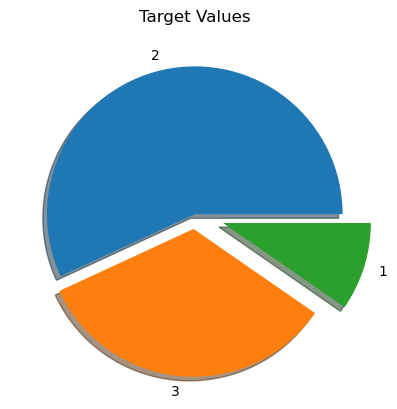

In [18]:
myexplode = [0, 0.1, 0.2]
plt.pie(list(train_labels['damage_grade'].value_counts()),labels=['2','3','1'],explode=myexplode,shadow=True)
plt.title("Target Values")
plt.show()

####  We can see that the target is Categorical
- **9.57% of bulidings were less damaged by earthquake**
- **57% of bulidings were medium damaged**
- **33.5% of bulidings were highly damaged due to earthquake**
- **From the previous plot, it is easy to see that our dataset is very imbalanced.**
- **It is important to mention that decision trees and random forests are extremely sensitive to imbalanced data.**



## Variable Types

### let's identify the categorical and numerical variables


In [34]:
target = train_labels['damage_grade']

# Get quantitative features
quantitative = [f for f in train_values.columns if train_values.dtypes[f] != 'object']

# Get categorical features
categorical = [f for f in train_values.columns if train_values.dtypes[f] == 'object']

print(f"Total number of features = {train_cols}")

print(f'Total number of Categorical features = {len(categorical)}')

print(f'Total number of Numerical features = {len(quantitative)}')

print("\nTarget = Categorical")

Total number of features = 39
Total number of Categorical features = 8
Total number of Numerical features = 31

Target = Categorical


In [48]:
print(colored("Categorical Features :",attrs=['bold']))
print(categorical)
print(colored("\nNumerical Features :",attrs=['bold']))
print(quantitative)

Categorical Features :
['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

Numerical Features :
['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_

### Missing Values

In [35]:
def check_missing_values(train_values):
    variables = train_values.columns
    
    count = []
    
    for variable in variables:
        length = train_values[variable].count()
        count.append(length)
        
    count_pct = np.round(100 * pd.Series(count) / len(train_values), 2)
    count = pd.Series(count)
    missing = pd.DataFrame()
    missing['variables'] = variables
    missing['count'] = len(train_values) - count
    missing['count_pct'] = 100 - count_pct
    missing = missing[missing['count_pct'] > 0]
    missing.sort_values(by=['count_pct'], inplace=True)
    missing_train = np.array(missing['variables'])

    if len(missing['count'])==0:
        print(colored("There is no Missing values",'red'))
    else:
        #Plot number of available data per variable
        plt.subplots(figsize=(15,6))
        
        # Plots missing data in percentage
        plt.subplot(1,2,1)
        plt.barh(missing['variables'], missing['count_pct'])
        plt.title('Count of missing training data in percent', fontsize=15)
        
        # Plots total row number of missing data
        plt.subplot(1,2,2)
        plt.barh(missing['variables'], missing['count'])
        plt.title('Count of missing training data as total records', fontsize=15)
        
        plt.show()

check_missing_values(train_values)

There is no Missing values


**There is no Missing values in this dataset**

## Numerical Features

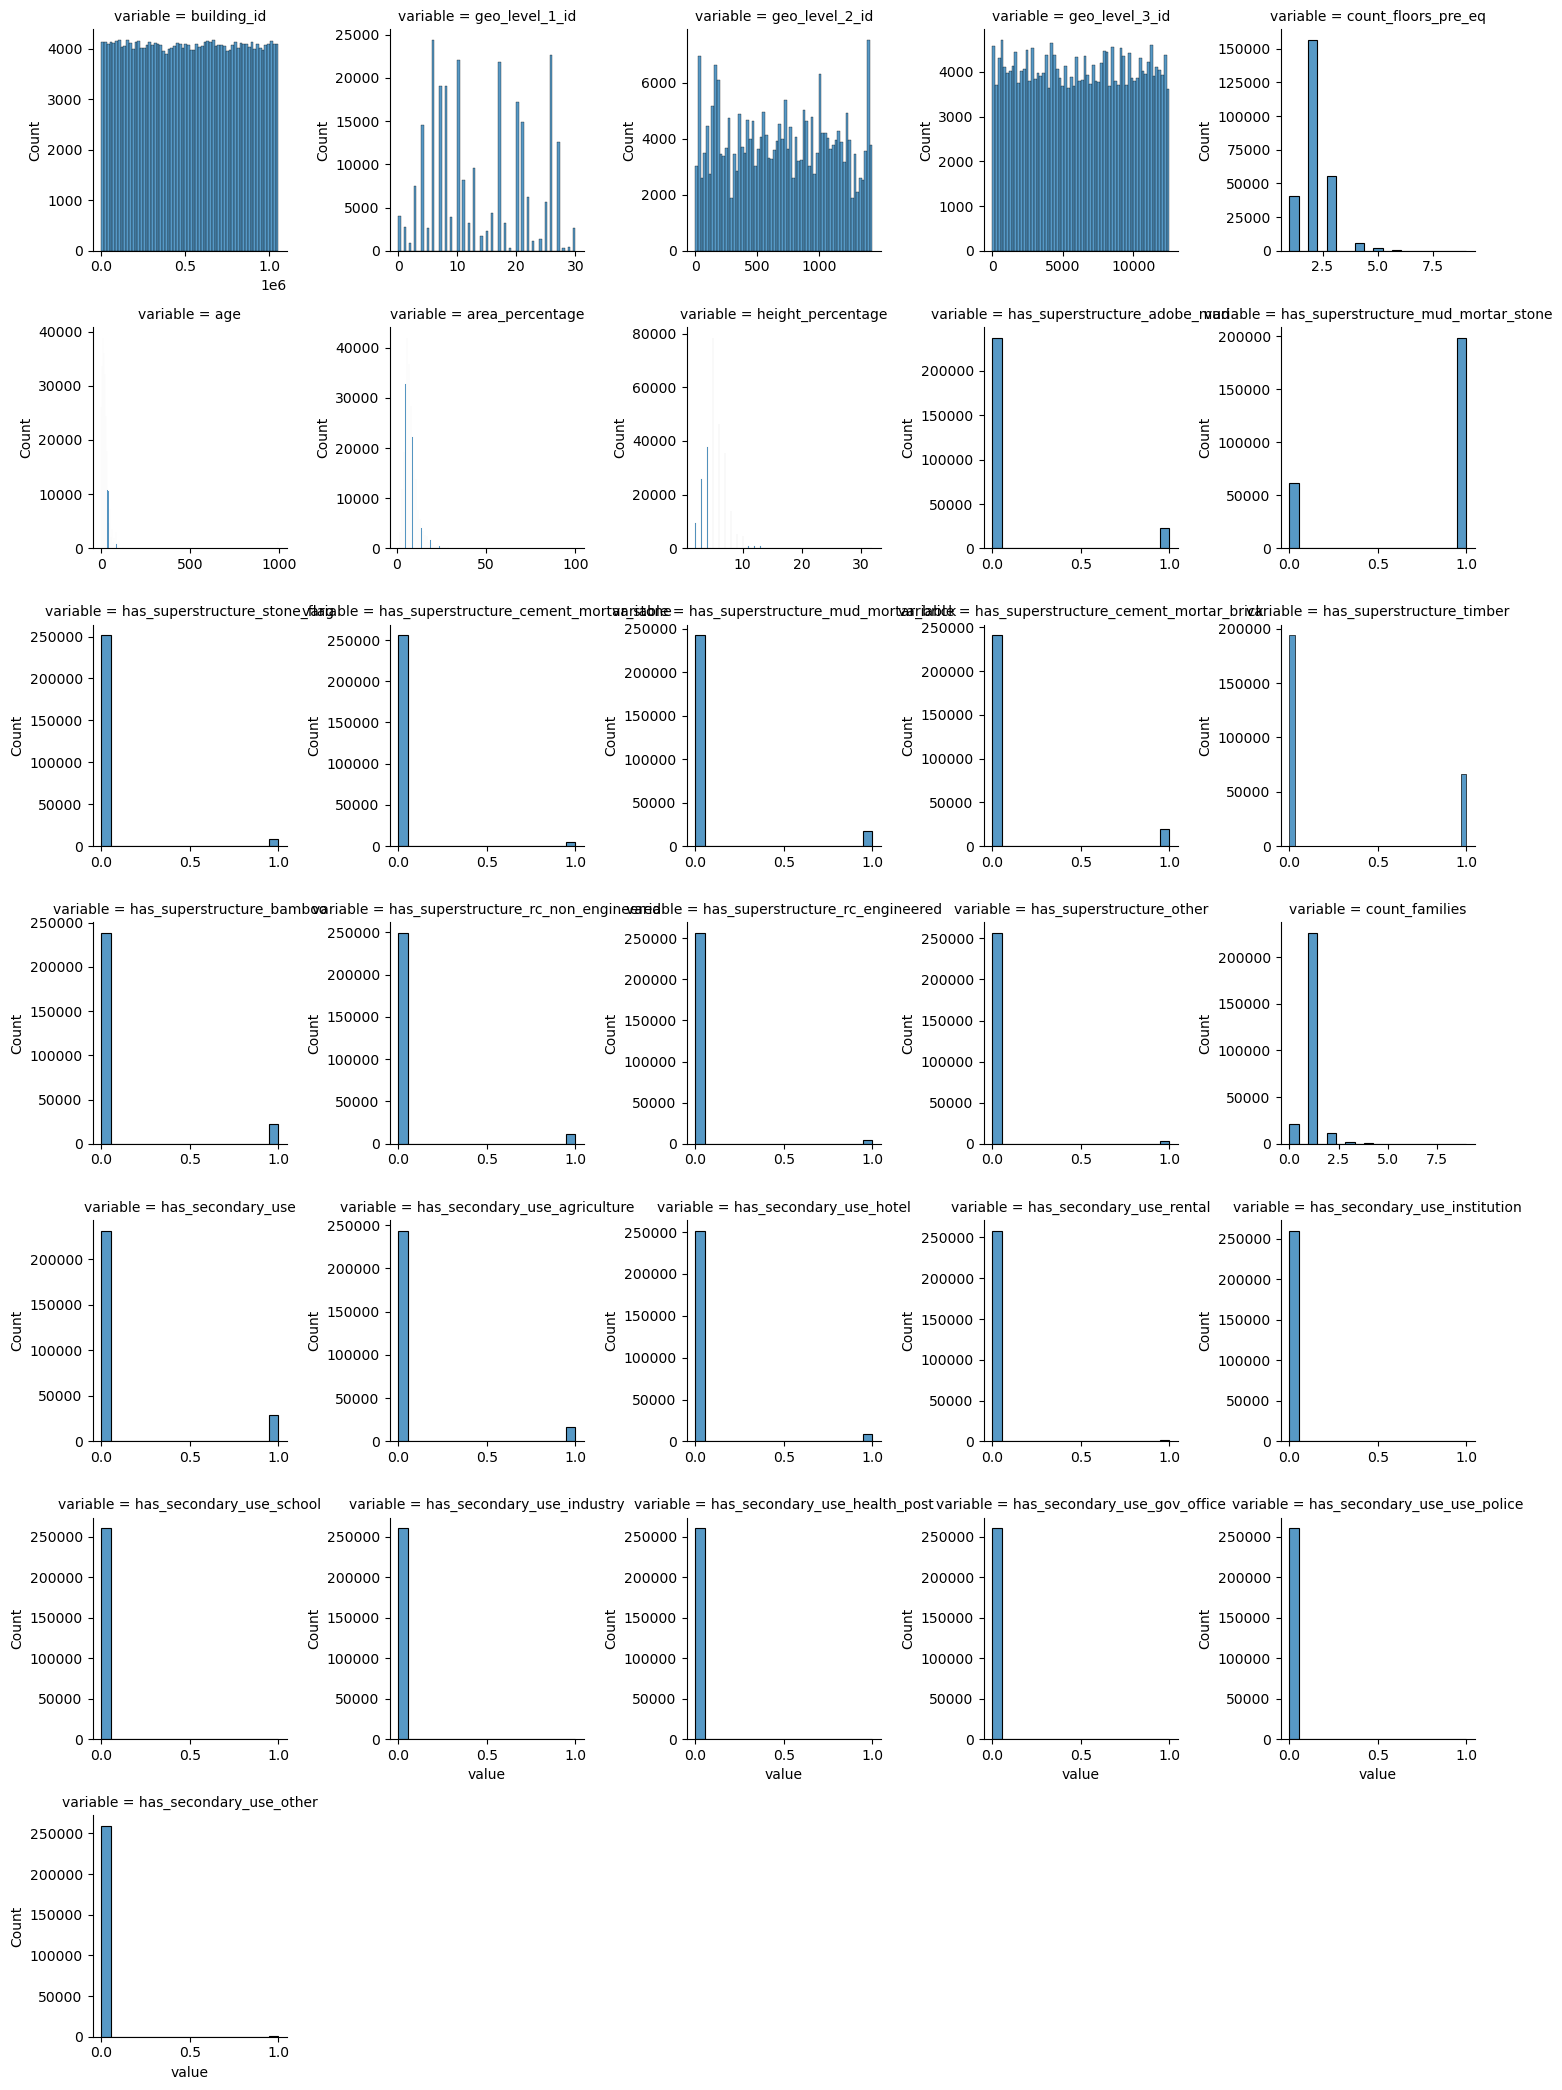

In [40]:
f = pd.melt(train_values, value_vars=quantitative)
graph = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
graph = graph.map(sns.histplot, "value")

- **There are buildings in the dataset with up to 9 floors, but the majority of the affect had only 2.**
- **Most of the features has outliers**

## Categorical Features

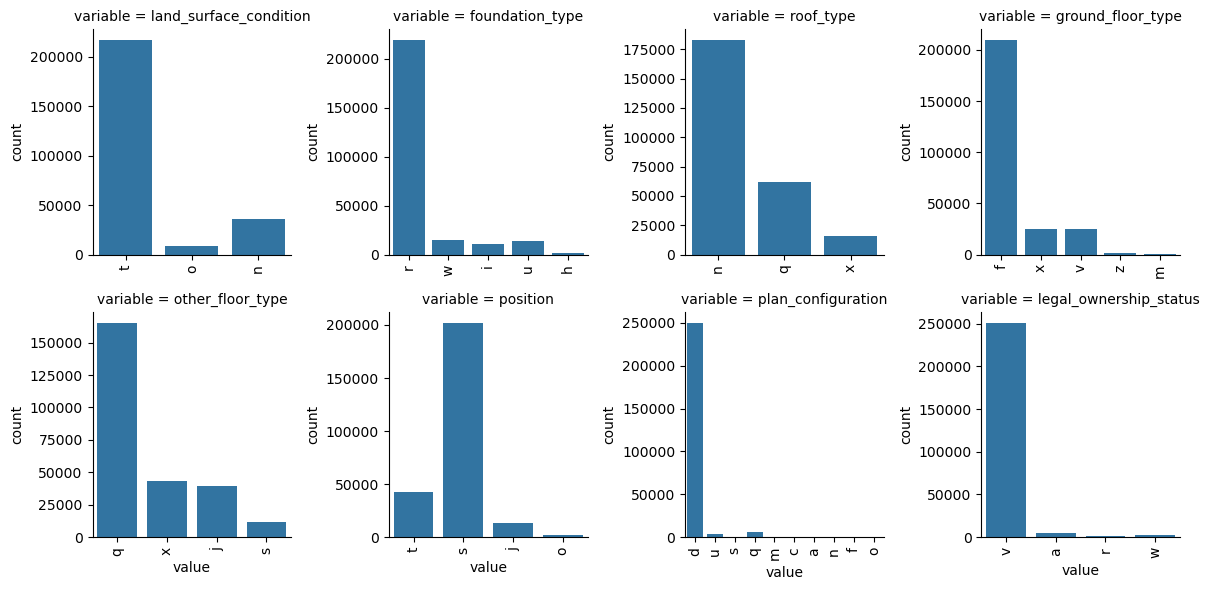

In [52]:

def countplot(x, **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)
    
f = pd.melt(train_values, value_vars=categorical)
graph = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
graph = graph.map(countplot, 'value')

**Found that in some features values are unevenly distributed and unbalanced**<br>
**It is important to mention that decision trees and random forests are extremely sensitive to imbalanced data.**<br>
**Scaling the features will helpful**

### Correlation of Features

<Axes: >

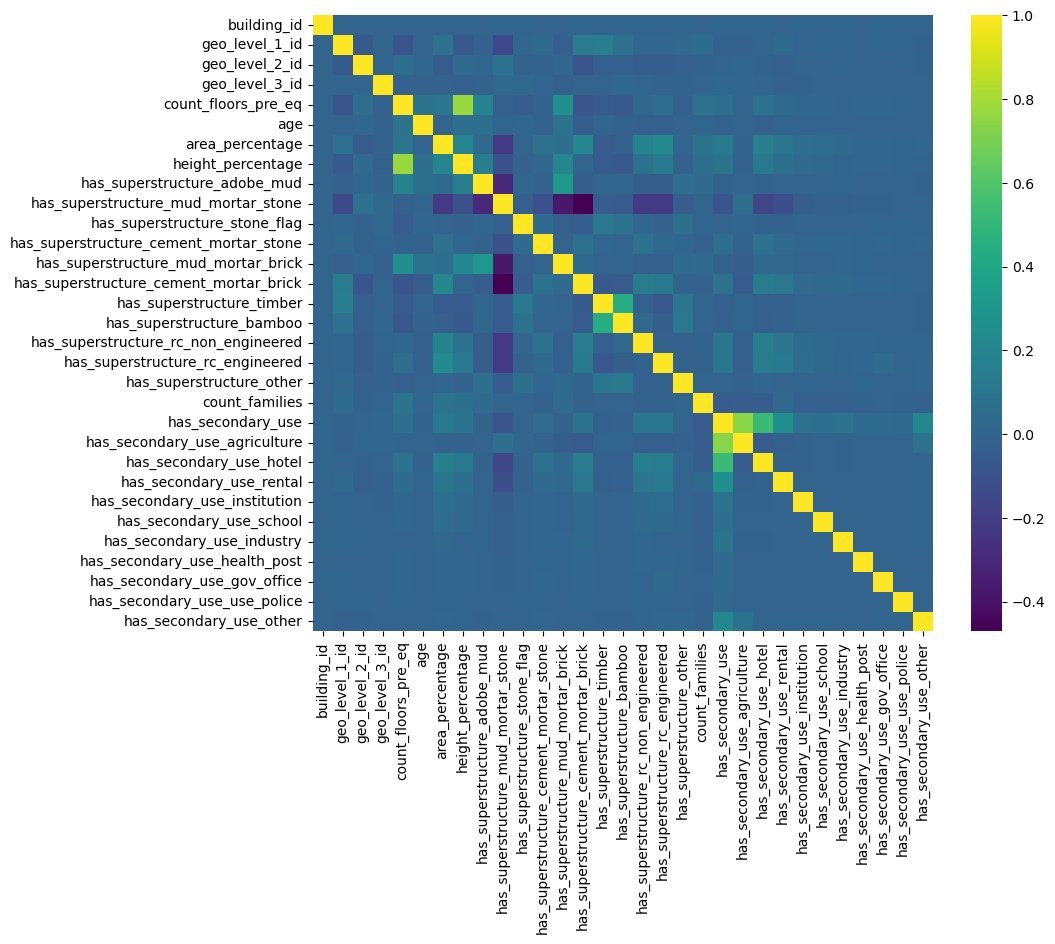

In [43]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
eda = train_values[quantitative]
cor=eda.corr()
cor=pd.DataFrame(cor)
sns.heatmap(cor,cmap="viridis",ax=ax)

### Conclusion
1. **Remove building_id in order to avoid misguide the model**<br>
2. **There are so many outliers, however, Random Forests algorithm is robust to the outliers**<br>
3. **Should change encoding system with LabelEncoder or OneHotEncoder considering whether each feature is incremental or not.**<br>
4. **There isn't any missing values in the dataset**<br>
5. **Targets need to be transformed to numerical**
